# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
#Import libraries 🔧
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [3]:
#Import the data 🔧
import pandas as pd
url = 'https://raw.githubusercontent.com/vandanara/UofUtah_IS4487/main/DataSets/adviseinvest_historical_data.csv'
df = pd.read_csv(url)

In [7]:
#View the datatypes 🔧

df.dtypes

,0
answered,int64
income,int64
female,object
age,int64
job,int64
num_dependents,int64
rent,int64
own_res,int64
new_car,float64
chk_acct,int64


In [8]:
#Describe the data 🔧
df.describe()


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

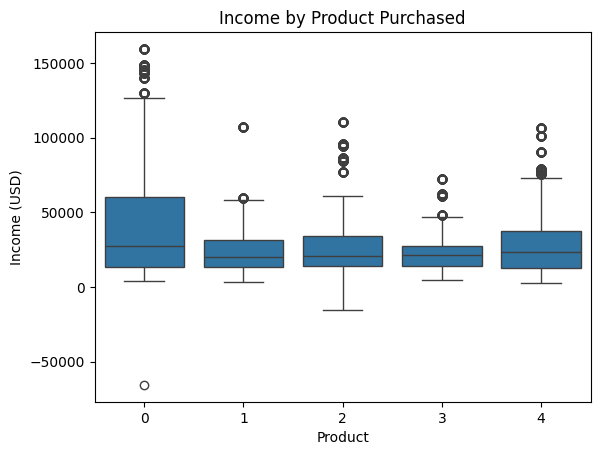

In [13]:
# Chart 1 🔧
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using your actual column names
sns.boxplot(x='product', y='income', data=df)

# Formatting
plt.title('Income by Product Purchased')
plt.xlabel('Product')
plt.ylabel('Income (USD)')

plt.show()


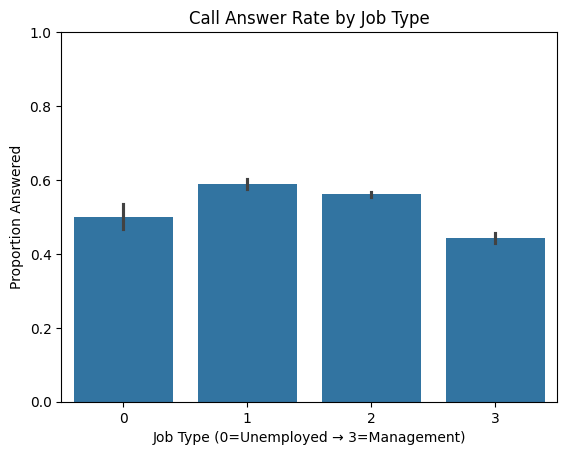

In [14]:
# Chart 2 🔧
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of answered calls by job type
sns.barplot(x='job', y='answered', data=df, estimator=lambda x: sum(x)/len(x))

# Formatting
plt.title('Call Answer Rate by Job Type')
plt.xlabel('Job Type (0=Unemployed → 3=Management)')
plt.ylabel('Proportion Answered')

plt.ylim(0, 1)  # Because it's a percentage

plt.show()

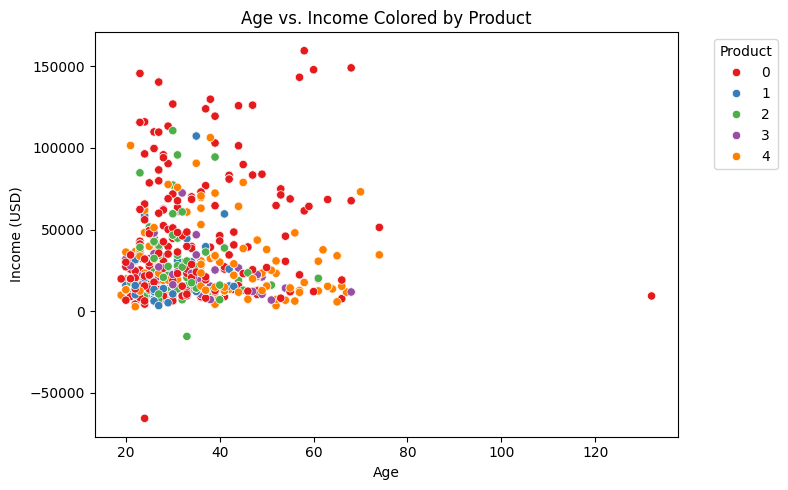

In [15]:
# Chart 3 🔧
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Age vs. Income, colored by Product
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='income', hue='product', palette='Set1')

# Formatting
plt.title('Age vs. Income Colored by Product')
plt.xlabel('Age')
plt.ylabel('Income (USD)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

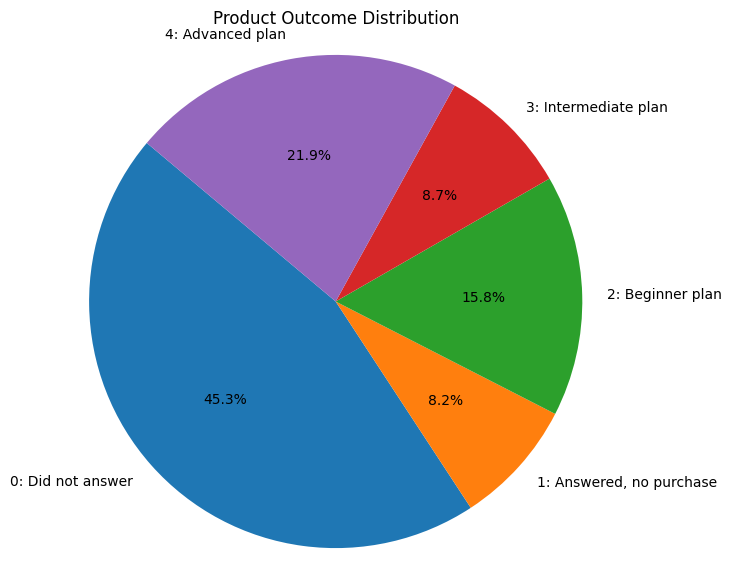

In [16]:
# Chart 4 🔧
import matplotlib.pyplot as plt

# Count the number of customers per product
product_counts = df['product'].value_counts().sort_index()

# Labels for the pie chart based on product codes
labels = [
    '0: Did not answer',
    '1: Answered, no purchase',
    '2: Beginner plan',
    '3: Intermediate plan',
    '4: Advanced plan'
]

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(product_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Product Outcome Distribution')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

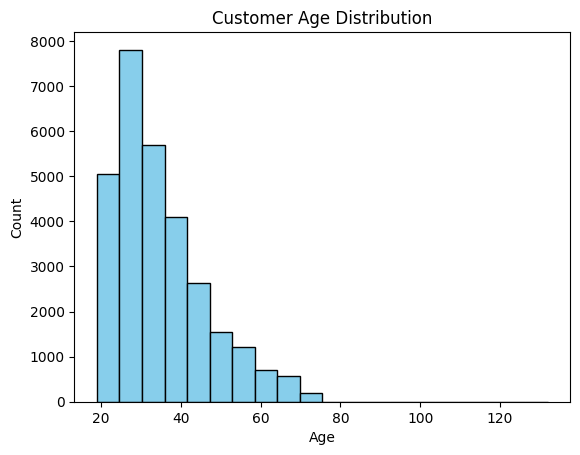

In [19]:
# Chart 5 🔧
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

# Formatting
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Write your response below: Not all variables are going to be equally useful. Variables like income, age, and job are meaningful variables that show variation across the product outcomes. These variables are likely correlated the target variable product. Other variables like mobile or number of dependents show less clear impact meaning they might be less relevant.

### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Write your response below: The dataset has a few issues, including negative income values and extreme outliers in age and income. Additionally, missing values in some columns is going to cause some problems. Overall, a small amount of data clearning would improve the reliability of the dataset.



1.   List item
2.   List item



## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_WoodMason.ipynb"